### Student Information
Name: 范詩涵

Student ID: M11407W19

GitHub ID: LouisFan0406

---

### Instructions

### First Phase Submission

1. First: do the **take home** exercises in the [DM2025-Lab1-Master](https://github.com/leoson-wu/DM2025-Lab1-Exercise/blob/main/DM2025-Lab1-Master.ipynb) that considered as **phase 1 (from exercise 1 to exercise 15)**. You can answer in the master file. __This part is worth 10% of your grade.__


2. Second: follow the same process from the [DM2025-Lab1-Master](https://github.com/leoson-wu/DM2025-Lab1-Exercise/blob/main/DM2025-Lab1-Master.ipynb) on **the new dataset** up **until phase 1**. You can skip some exercises if you think some steps are not necessary. However main exercises should be completed. You don't need to explain all details as we did (some **minimal comments** explaining your code are useful though).  __This part is worth 15% of your grade.__
    -  Use [the new dataset](https://github.com/leoson-wu/DM2025-Lab1-Exercise/blob/main/newdataset/Reddit-stock-sentiment.csv). The dataset contains a 16 columns including 'text' and 'label', with the sentiment labels being: 1.0 is positive, 0.0 is neutral and -1.0 is negative. You can simplify the dataset and use only the columns that you think are necessary. 
    
    - You are allowed to use and modify the `helper` functions in the folder of the first lab session (notice they may need modification) or create your own.
    - Use this file to complete the homework from the second part. Make sure the code can be run from the beginning till the end and has all the needed output.


3. Third: please attempt the following tasks on **the new dataset**. __This part is worth 10% of your grade.__
    - Generate meaningful **new data visualizations**. Refer to online resources and the Data Mining textbook for inspiration and ideas. 
    


4. Fourth: It's hard for us to follow if your code is messy, so please **tidy up your notebook** and **add minimal comments where needed**. __This part is worth 5% of your grade.__

You can submit your homework following these guidelines: [DM2025-Lab1-announcement](https://github.com/leoson-wu/DM2025-Lab1-Announcement/blob/main/README.md). Make sure to commit and save your changes to your repository __BEFORE the deadline (September 28th 11:59 pm, Sunday)__. 

### Second Phase Submission 

**You can keep the answer for phase 1 for easier running and update the phase 2 on the same page.**

1. First: Continue doing the **take home** exercises in the [DM2025-Lab1-Master](https://github.com/leoson-wu/DM2025-Lab1-Exercise/blob/main/DM2025-Lab1-Master.ipynb) for **phase 2, starting from Finding frequent patterns**. Use the same master(.ipynb) file. Answer from phase 1 will not be considered at this stage. You can answer in the master file. __This part is worth 10% of your grade.__


2. Second: Continue from first phase and do the same process from the [DM2025-Lab1-Master](https://github.com/leoson-wu/DM2025-Lab1-Exercise/blob/main/DM2025-Lab1-Master.ipynb) on **the new dataset** for phase 2, starting from Finding frequent pattern. You can skip some exercises if you think some steps are not necessary. However main exercises should be completed. You don't need to explain all details as we did (some **minimal comments** explaining your code are useful though).  __This part is worth 15% of your grade.__
    - Continue using this file to complete the homework from the second part. Make sure the code can be run from the beginning till the end and has all the needed output. Use the same new dataset as in phase 1.
    
    - You are allowed to use and modify the `helper` functions in the folder of the first lab session (notice they may need modification) or create your own.

3. Third: please attempt the following tasks on **the new dataset**. __This part is worth 20% of your grade.__
    - Use this file to answer.
    - Generate **TF-IDF features** from the tokens of each text. This will generating a document matrix, however, the weights will be computed differently (using the TF-IDF value of each word per document as opposed to the word frequency).  Refer to this Scikit-learn [guide](http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html) .
    - Implement a simple **Naive Bayes classifier** that automatically classifies the records into their categories. Use both the TF-IDF features and word frequency features to build two seperate classifiers. Note that for the TF-IDF features you might need to use other type of NB classifier different than the one in the Master Notebook. Comment on the differences and when using augmentation with feature pattern.  Refer to this [article](https://hub.packtpub.com/implementing-3-naive-bayes-classifiers-in-scikit-learn/).


4. Fourth: In the lab, we applied each step really quickly just to illustrate how to work with your dataset. There are somethings that are not ideal or the most efficient/meaningful. Each dataset can be handled differently as well. What are those inefficent parts you noticed? How can you improve the Data preprocessing for these specific datasets? __This part is worth 10% of your grade.__


5. Fifth: It's hard for us to follow if your code is messy, so please **tidy up your notebook** and **add minimal comments where needed**. __This part is worth 5% of your grade.__


You can submit your homework following these guidelines: [DM2025-Lab1-announcement](https://github.com/leoson-wu/DM2025-Lab1-Announcement/blob/main/README.md). Make sure to commit and save your changes to your repository __BEFORE the deadline (October 19th 11:59 pm, Sunday)__. 

# Phase 1

## 1. Environment setup and test

In [90]:
### Begin Assignment Here
###environment setup
import pandas as pd
import numpy as np
import nltk
nltk.download('punkt') # download the NLTK datasets
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import CountVectorizer
import plotly as py
import math
# If you get "ModuleNotFoundError: No module named 'PAMI'"
# run the following in a new Jupyter cell:
# !pip3 install PAMI
import PAMI
import umap

categories = ['alt.atheism', 'soc.religion.christian', 'comp.graphics', 'sci.med']
twenty_train = fetch_20newsgroups(subset='train', categories=categories, shuffle=True, random_state=42)

[nltk_data] Downloading package punkt to /Users/louisfan/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [91]:
# TEST necessary for when working with external scripts
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [92]:
import sys
print(sys.executable) # c:\<your path to the project directory>\.venv\Scripts\python.exe
print(sys.version) #3.11.0

/Users/louisfan/DM2025Labs/DM2025-Lab1-Exercise/.venv/bin/python3
3.11.13 (main, Jun  3 2025, 18:38:25) [Clang 17.0.0 (clang-1700.0.13.3)]


## 2. Data Preparation

In [93]:
import pandas as pd
from sklearn.utils import Bunch

# Load dataset containing text and numeric labels
df = pd.read_csv("newdataset/Reddit-stock-sentiment.csv")[['text', 'label']]
df['text'] = df['text'].astype(str).str.strip()
df = df.dropna(subset=['text', 'label'])

# Define mapping from numeric labels to sentiment categories
label_type = {-1: "negative", 0: "neutral", 1: "positive"}

# Extract core fields for later use
data = df['text'].tolist()
target = df['label'].astype(int).tolist()
target_names = [label_type[i] for i in sorted(label_type.keys())]

# Wrap into a Bunch object
# Reason:
# 1. The scikit-learn built-in datasets (e.g. 20 Newsgroups) are provided in Bunch format.
# 2. By converting our dataset into the same structure, we can directly reuse 
#    the same code patterns as in the official tutorials (e.g. data, target, target_names).
# 3. This ensures consistency, better readability, and avoids rewriting downstream code.
sentiment_train = Bunch(
    data=data,
    target=target,
    target_names=target_names,
    filenames=[f"doc_{i}" for i in range(len(df))]  # synthetic filenames for completeness
)

# Preview to verify the structure
# first two documents
print(sentiment_train.data[:2])  
# list of class names
print(sentiment_train.target_names)   
# dataset size check
print(len(sentiment_train.data), len(sentiment_train.filenames))  

['Calls on retards', 'Stunt as in like why did they even make a big deal about starting it in the first place? No company should ever talk about politics ever.']
['negative', 'neutral', 'positive']
847 847


In [94]:
# Print an example document from the dataset
# Converting to Bunch allows us to access data, target, and target_names
# in the same way as scikit-learn's built-in datasets, so we can reuse the same workflow.
print("\n".join(sentiment_train.data[0].split("\n")))

# Determine the label of the example using target and target_names
print(sentiment_train.target_names[sentiment_train.target[0]])
print(sentiment_train.target[0])

Calls on retards
positive
-1


In [95]:
# Get the category of the first 10 documents (numeric labels)
print(sentiment_train.target[:10])

# Show the text version of the labels for the first 10 documents
for t in sentiment_train.target[:10]:
    print(sentiment_train.target_names[t+1])  # offset if labels are -1,0,1

[-1, 0, 0, 1, -1, 0, -1, 0, 1, 1]
negative
neutral
neutral
positive
negative
neutral
negative
neutral
positive
positive


## Exercise 1

In [96]:
# Print out the text data for the first three samples in the dataset.
#
# Note:
# convert the dataset into a Bunch object because:
# 1. scikit-learn built-in datasets (like 20 Newsgroups) are provided in Bunch format.
# 2. Using the same structure (data, target, target_names) lets us reuse
#    the exact same code patterns from the tutorials without rewriting.
# 3. This ensures consistency, readability, and keeps the workflow uniform.

for i in range(3):
    print(f"example {i+1}")
    # sentiment_train.data[i] → the i-th text document
    # split("\n") → keeps the paragraph structure when printing
    print("\n".join(sentiment_train.data[i].split("\n")))

example 1
Calls on retards
example 2
Stunt as in like why did they even make a big deal about starting it in the first place? No company should ever talk about politics ever.
example 3
Seeing lots of red in the ticker.


## 3. Data Transformation

In [97]:
# Convert the Bunch object into a pandas DataFrame
# Reason: a DataFrame provides a convenient tabular format for exploration and analysis
X = pd.DataFrame({'text': sentiment_train.data, 'label': sentiment_train.target})

# Check dataset size
print(len(X))

847


In [98]:
# Preview first 10 rows
X[0:10]

,text,label
0,Calls on retards,-1
1,Stunt as in like why did they even make a big ...,0
2,Seeing lots of red in the ticker.,0
3,Vision Marine Technologies Inc. is rewriting t...,1
4,He didn’t say thank you.,-1
5,"Hoping to ejaculate in wet warm puss tonight, ...",0
6,Trump will respond to china increasing their t...,-1
7,Confirmed not a trap. Its been like this for p...,0
8,Am I the only one seeing the cup & handle brea...,1
9,HLGN is $10. Hurry and catch it now before it ...,1


In [99]:
for t in X["text"][:5]:
    print(t)

Calls on retards
Stunt as in like why did they even make a big deal about starting it in the first place? No company should ever talk about politics ever.
Seeing lots of red in the ticker.
Vision Marine Technologies Inc. is rewriting the watercraft rulebook. Their collaboration with Shaun Torrente has achieved the unthinkable – a blazing 116 mph on water! This isn't just about speed; it's about propelling electric boating into a new era. Their cutting-edge technology, combined with Torrente's skill, is making waves that'll ripple for generations.

**Highlight Main Points**

* Vision Marine Technologies Inc. achieves a record-breaking 116 mph speed on water with Shaun Torrente.
* The feat highlights the power of electric boating and pushes the limits of innovation.
* Partners like Octillion Power Systems and Danfoss Editron contribute to this groundbreaking achievement.

**TLDR**

Hold onto your seats – Vision Marine Technologies Inc. and Shaun Torrente have shattered the water-speed re

In [100]:
# Add numeric label column
X['label'] = sentiment_train.target

# Add label name column using the mapping defined earlier
X['label_type'] = X['label'].map(label_type)

# Preview first 10 rows
X[0:10]

,text,label,label_type
0,Calls on retards,-1,negative
1,Stunt as in like why did they even make a big ...,0,neutral
2,Seeing lots of red in the ticker.,0,neutral
3,Vision Marine Technologies Inc. is rewriting t...,1,positive
4,He didn’t say thank you.,-1,negative
5,"Hoping to ejaculate in wet warm puss tonight, ...",0,neutral
6,Trump will respond to china increasing their t...,-1,negative
7,Confirmed not a trap. Its been like this for p...,0,neutral
8,Am I the only one seeing the cup & handle brea...,1,positive
9,HLGN is $10. Hurry and catch it now before it ...,1,positive


In [101]:
# Keep only the text and the sentiment label for clarity
X[:10][["text", "label_type"]]

,text,label_type
0,Calls on retards,negative
1,Stunt as in like why did they even make a big ...,neutral
2,Seeing lots of red in the ticker.,neutral
3,Vision Marine Technologies Inc. is rewriting t...,positive
4,He didn’t say thank you.,negative
5,"Hoping to ejaculate in wet warm puss tonight, ...",neutral
6,Trump will respond to china increasing their t...,negative
7,Confirmed not a trap. Its been like this for p...,neutral
8,Am I the only one seeing the cup & handle brea...,positive
9,HLGN is $10. Hurry and catch it now before it ...,positive


In [102]:
X[-10:][["text", "label_type"]]

,text,label_type
837,Finance media lying \n\n*Surprise*,negative
838,I am all in,neutral
839,The Art of the Deal…,neutral
840,Lol fr,neutral
841,So countries “begging to stop the tariffs” and...,positive
842,Invest now it is going to shoot up tomorrow,positive
843,Where can I read this?,neutral
844,"Upgrades, Downgrades\n\n [Stock Analyst Recomm...",neutral
845,i sold my puts so i expect cheeto to declare w...,negative
846,![img](emote|t5_2th52|31224),neutral


In [103]:
# using loc (by label)
# Query the first 10 records, only showing text and sentiment type
X.loc[:10, ['text', 'label_type']]

,text,label_type
0,Calls on retards,negative
1,Stunt as in like why did they even make a big ...,neutral
2,Seeing lots of red in the ticker.,neutral
3,Vision Marine Technologies Inc. is rewriting t...,positive
4,He didn’t say thank you.,negative
5,"Hoping to ejaculate in wet warm puss tonight, ...",neutral
6,Trump will respond to china increasing their t...,negative
7,Confirmed not a trap. Its been like this for p...,neutral
8,Am I the only one seeing the cup & handle brea...,positive
9,HLGN is $10. Hurry and catch it now before it ...,positive


In [104]:
# using iloc (by position)
# Query the first 10 records, selecting the first two columns (text + label_type)
 # assuming column order is [text, label, label_type]
X.iloc[:10, [0, 2]]  

,text,label_type
0,Calls on retards,negative
1,Stunt as in like why did they even make a big ...,neutral
2,Seeing lots of red in the ticker.,neutral
3,Vision Marine Technologies Inc. is rewriting t...,positive
4,He didn’t say thank you.,negative
5,"Hoping to ejaculate in wet warm puss tonight, ...",neutral
6,Trump will respond to china increasing their t...,negative
7,Confirmed not a trap. Its been like this for p...,neutral
8,Am I the only one seeing the cup & handle brea...,positive
9,HLGN is $10. Hurry and catch it now before it ...,positive


## Exercise 2

In [105]:
# Explore different querying techniques on the sentiment dataset

# Show DataFrame column names
print(X.columns)

# Query first 10 records, only showing numeric and text labels
print(X.loc[0:10, ['label', 'label_type']])

# Access a single value using .at (fast scalar access)
print(X.at[0, 'label_type'])

# Unique sentiment categories
print(X["label_type"].unique())

# Count how many samples per sentiment
print(X["label_type"].value_counts())

# Number of unique categories
print(X["label_type"].nunique())

# Query all rows that are positive sentiment
print(X[X["label_type"] == "positive"].head())

Index(['text', 'label', 'label_type'], dtype='object')
    label label_type
0      -1   negative
1       0    neutral
2       0    neutral
3       1   positive
4      -1   negative
5       0    neutral
6      -1   negative
7       0    neutral
8       1   positive
9       1   positive
10      0    neutral
negative
['negative' 'neutral' 'positive']
label_type
neutral     423
negative    315
positive    109
Name: count, dtype: int64
3
                                                 text  label label_type
3   Vision Marine Technologies Inc. is rewriting t...      1   positive
8   Am I the only one seeing the cup & handle brea...      1   positive
9   HLGN is $10. Hurry and catch it now before it ...      1   positive
34  So they went from saying redditors are bad for...      1   positive
38    Hey our net worth match now, we can be friends!      1   positive


## Exercise 3

In [106]:
# Fetch records belonging to the "positive" sentiment
# Query every 10th record and only show the first 5

X[X["label_type"] == "positive"][::10][:5]

,text,label,label_type
3,Vision Marine Technologies Inc. is rewriting t...,1,positive
78,I think it’s gonna work itself out. I bought t...,1,positive
168,The obvious can also be refreshing from CNBC: ...,1,positive
219,Same. Back to break even after that last rip b...,1,positive
319,Etrade has a feed of news articles about how r...,1,positive


## 4. Data Mining using Pandas

In [107]:
import helpers.data_mining_helpers as dmh

In [108]:
# check missing values
X.isnull()

,text,label,label_type
0,False,False,False
1,False,False,False
2,False,False,False
3,False,False,False
4,False,False,False
...,...,...,...
842,False,False,False
843,False,False,False
844,False,False,False
845,False,False,False


In [109]:
X.isnull().apply(lambda x: dmh.check_missing_values(x))

,text,label,label_type
0,The amoung of missing records is:,The amoung of missing records is:,The amoung of missing records is:
1,0,0,0


## Exercise 4

In [110]:
# 1. Check missing values by row
X.isnull().apply(lambda x: dmh.check_missing_values(x), axis=1)

# 2. Create a dummy record with missing values
# Using Series format
dummy_series = pd.Series(["dummy_record", 1], index=["text", "label"])
print(dummy_series)

# Convert Series to DataFrame and transpose
dummy_df = dummy_series.to_frame().T
print(dummy_df)

# Add the dummy record into the dataset
result_with_series = pd.concat([X, dummy_df], ignore_index=True)
print("Length after adding dummy record:", len(result_with_series))

# Check missing values after adding dummy record
print(result_with_series.isnull().apply(lambda x: dmh.check_missing_values(x)))

# 3. Create dummy record with dictionary format
dummy_dict = [{'text': 'dummy_record', 'label': 1}]
X = pd.concat([X, pd.DataFrame(dummy_dict)], ignore_index=True)
print("Length after adding dummy record (dict):", len(X))

# Check missing values again
print(X.isnull().apply(lambda x: dmh.check_missing_values(x)))

# 4. Remove records with missing values
X.dropna(inplace=True)

# Final check
print("\nLength after cleaning:", len(X))
print("Missing values per column (after cleaning):")
print(X.isnull().sum())

text     dummy_record
label               1
dtype: object
           text label
0  dummy_record     1
Length after adding dummy record: 848
                                 text                               label  \
0  The amoung of missing records is:   The amoung of missing records is:    
1                                   0                                   0   

                           label_type  
0  The amoung of missing records is:   
1                                   1  
Length after adding dummy record (dict): 848
                                 text                               label  \
0  The amoung of missing records is:   The amoung of missing records is:    
1                                   0                                   0   

                           label_type  
0  The amoung of missing records is:   
1                                   1  

Length after cleaning: 847
Missing values per column (after cleaning):
text          0
label         0
label_t

In [111]:
X

,text,label,label_type
0,Calls on retards,-1,negative
1,Stunt as in like why did they even make a big ...,0,neutral
2,Seeing lots of red in the ticker.,0,neutral
3,Vision Marine Technologies Inc. is rewriting t...,1,positive
4,He didn’t say thank you.,-1,negative
...,...,...,...
842,Invest now it is going to shoot up tomorrow,1,positive
843,Where can I read this?,0,neutral
844,"Upgrades, Downgrades\n\n [Stock Analyst Recomm...",0,neutral
845,i sold my puts so i expect cheeto to declare w...,-1,negative


## Exercise 5
.isnull() only detects real missing values (np.nan, None).
Strings like "NaN", "None", or empty "" are not considered missing in pandas, so .isnull() does not mark them.

In [113]:
X_sample = X.sample(n=500) #random state
len(X_sample)
X_sample[0:4]

,text,label,label_type
628,Remember when Conservatives though it was impr...,0,neutral
258,The stock market was higher then. \n\nMy under...,0,neutral
625,"No they won't raise tariffs anymore, not that ...",0,neutral
155,$DVAX,0,neutral


## Exercise 6 

In [114]:
print("Shape of X:", X.shape)
print("Shape of X_sample:", X_sample.shape)

Shape of X: (847, 3)
Shape of X_sample: (500, 3)


In [115]:
display(X.head())
display(X_sample.head())

,text,label,label_type
0,Calls on retards,-1,negative
1,Stunt as in like why did they even make a big ...,0,neutral
2,Seeing lots of red in the ticker.,0,neutral
3,Vision Marine Technologies Inc. is rewriting t...,1,positive
4,He didn’t say thank you.,-1,negative


,text,label,label_type
628,Remember when Conservatives though it was impr...,0,neutral
258,The stock market was higher then. \n\nMy under...,0,neutral
625,"No they won't raise tariffs anymore, not that ...",0,neutral
155,$DVAX,0,neutral
101,Worry about your own country buddy.,0,neutral


In [116]:
print("1.",X.index[:10])
print("2.",X_sample.index[:10])

1. Index([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype='int64')
2. Index([628, 258, 625, 155, 101, 337, 596, 389, 289, 285], dtype='int64')


In [117]:
import matplotlib.pyplot as plt
%matplotlib inline

In [118]:
label_type

{-1: 'negative', 0: 'neutral', 1: 'positive'}

label_type
neutral     423
negative    315
positive    109
Name: count, dtype: int64


<Axes: title={'center': 'label_type'}, xlabel='label_type'>

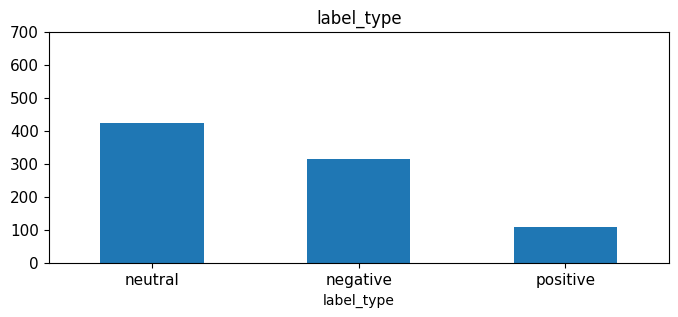

In [124]:
print(X.label_type.value_counts())

# plot barchart for X
X.label_type.value_counts().plot(kind = 'bar',
                                    title = 'label_type',
                                    ylim = [0, 700],        
                                    rot = 0, fontsize = 11, figsize = (8,3))

label_type
neutral     254
negative    184
positive     62
Name: count, dtype: int64


<Axes: title={'center': 'label_type'}, xlabel='label_type'>

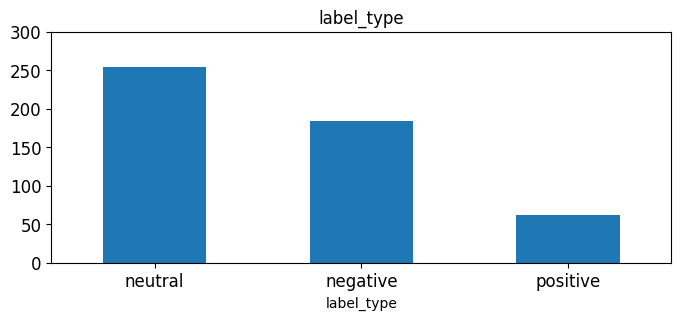

In [123]:
print(X_sample.label_type.value_counts())

# plot barchart for X_sample
X_sample.label_type.value_counts().plot(kind = 'bar',
                                           title = 'label_type',
                                           ylim = [0, 300], 
                                           rot = 0, fontsize = 12, figsize = (8,3))

## 5. Data Processing

## Exercise 7

<Axes: title={'center': 'label_type'}, xlabel='label_type'>

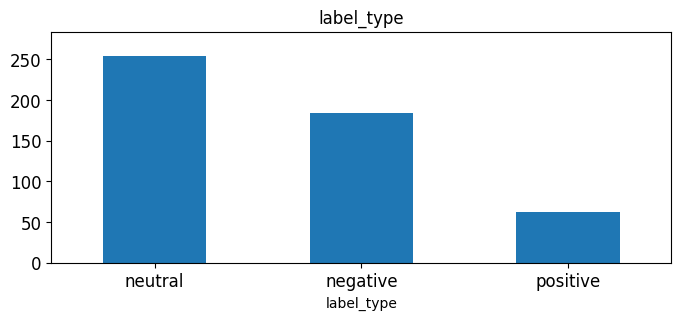

In [125]:
X_sample.label_type.value_counts().plot(kind='bar',
                                           title='label_type',
                                           ylim=[0,X_sample.label_type.value_counts().max()+30],
                                           rot = 0, 
                                           fontsize =12,
                                           figsize=(8,3))

## Exercise 8

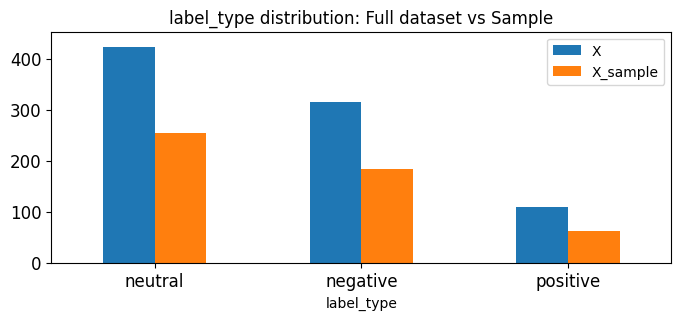

In [127]:
X_counts = X['label_type'].value_counts()
X_sample_counts= X_sample['label_type'].value_counts()

X_compare = pd.concat([X_counts, X_sample_counts], axis=1)
X_compare.columns = ['X', 'X_sample']


X_compare.plot(kind='bar',
    figsize=(8,3),
    rot=0,
    title='label_type distribution: Full dataset vs Sample',
    ylim=[0,X.label_type.value_counts().max()+30],
    fontsize =12
)

plt.show()

### Feature Creation

In [128]:
import nltk
nltk.download("punkt")
nltk.download("punkt_tab")

[nltk_data] Downloading package punkt to /Users/louisfan/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     /Users/louisfan/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [129]:
# takes a like a minute or two to process

X['unigrams'] = X['text'].apply(lambda x: dmh.tokenize_text(x))

In [132]:
X[0:4]["unigrams"]

0                                 [Calls, on, retards]
1    [Stunt, as, in, like, why, did, they, even, ma...
2          [Seeing, lots, of, red, in, the, ticker, .]
3    [Vision, Marine, Technologies, Inc., is, rewri...
Name: unigrams, dtype: object

In [133]:
X[0:4]

,text,label,label_type,unigrams
0,Calls on retards,-1,negative,"[Calls, on, retards]"
1,Stunt as in like why did they even make a big ...,0,neutral,"[Stunt, as, in, like, why, did, they, even, ma..."
2,Seeing lots of red in the ticker.,0,neutral,"[Seeing, lots, of, red, in, the, ticker, .]"
3,Vision Marine Technologies Inc. is rewriting t...,1,positive,"[Vision, Marine, Technologies, Inc., is, rewri..."


In [135]:
list(X[1:2]['unigrams'])

[['Stunt',
  'as',
  'in',
  'like',
  'why',
  'did',
  'they',
  'even',
  'make',
  'a',
  'big',
  'deal',
  'about',
  'starting',
  'it',
  'in',
  'the',
  'first',
  'place',
  '?',
  'No',
  'company',
  'should',
  'ever',
  'talk',
  'about',
  'politics',
  'ever',
  '.']]

In [137]:
from sklearn.feature_extraction.text import CountVectorizer

count_vect = CountVectorizer()
X_counts = count_vect.fit_transform(X.text) 
#learn the vocabulary and return document-term matrix
print(X_counts[0])

  (np.int32(0), np.int32(692))	1
  (np.int32(0), np.int32(2706))	1
  (np.int32(0), np.int32(3248))	1


In [139]:
# Build a CountVectorizer and fit on new dataset
count_vect = CountVectorizer()
X_counts = count_vect.fit_transform(X["text"])

# Show the vocabulary size (number of unique tokens)
print("Vocabulary size:", len(count_vect.get_feature_names_out()))

# Show some sample words from the vocabulary by index
print("Example features:")
print("Index 100:", count_vect.get_feature_names_out()[100])
print("Index 500:", count_vect.get_feature_names_out()[500])
print("Index 1000:", count_vect.get_feature_names_out()[1000])

# Build analyzer function to see how CountVectorizer processes text
analyze = count_vect.build_analyzer()
print("\nAnalyzer result:")
print(analyze("You are so weird, don't change"))

# Explanation:
# 1. CountVectorizer builds a term-document matrix (rows=docs, cols=words).
# 2. get_feature_names_out() shows the vocabulary (unique words).
# 3. build_analyzer() lets us test the preprocessing (tokenization, stopword removal, etc.).

Vocabulary size: 4346
Example features:
Index 100: 35
Index 500: begin
Index 1000: crashes

Analyzer result:
['you', 'are', 'so', 'weird', 'don', 'change']


## Exercise 9

In [142]:
analyze(X.text[1])

['stunt',
 'as',
 'in',
 'like',
 'why',
 'did',
 'they',
 'even',
 'make',
 'big',
 'deal',
 'about',
 'starting',
 'it',
 'in',
 'the',
 'first',
 'place',
 'no',
 'company',
 'should',
 'ever',
 'talk',
 'about',
 'politics',
 'ever']

In [146]:
X_counts.shape

(847, 4346)

In [147]:
count_vect.get_feature_names_out()[0:10]

array(['00', '000', '01378', '02', '027', '03', '06', '08', '10', '100'],
      dtype=object)

In [149]:
X_counts[0:5, 0:100].toarray()

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0,

In [150]:
count_vect.get_feature_names_out()[0:1]

array(['00'], dtype=object)

## Exercise 10

In [153]:
# Pick a specific record
HW_index = 6  

# Get nonzero indices (the words that appear in this record)
term_indices = X_counts[HW_index].nonzero()[1]

# Map indices back to actual words
words = count_vect.get_feature_names_out()[term_indices]

print("Words in record", HW_index, ":")
print(words)

Words in record 6 :
['even' 'starting' 'it' 'the' 'is' 'their' 'and' 'to' 'be' 'trump' 'will'
 'respond' 'china' 'increasing' 'tariffs' 'looking' 'fire' 'jerome'
 'powell' 'earnings' 'reporting' 'personally' 'think' 'next' 'few' 'weeks'
 'are' 'going' 'brutal' 'if' 'all' 'companies' 'adjust' 'downwards' 'jpow'
 'fired' 'can' 'see' 'down' 'lot' 'very' 'quickly']


## Exercise 11

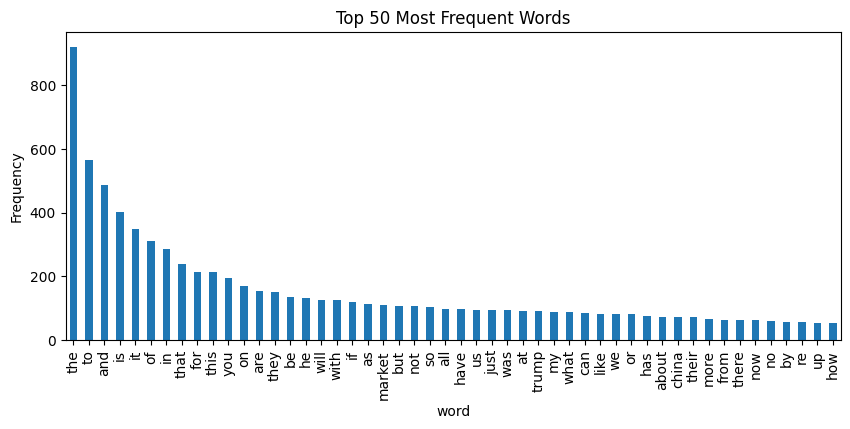

In [154]:
# Answer here
word_counts = np.asarray(X_counts.sum(axis=0)).ravel()
vocab = count_vect.get_feature_names_out()

word_freq = pd.DataFrame({
    "word": vocab,
    "count": word_counts
}).sort_values(by="count", ascending=False)


top_n = 50
word_freq.head(top_n).plot(
    kind="bar",
    x="word",
    y="count",
    title="Top 50 Most Frequent Words",
    figsize=(10,4),
    legend=False
)
plt.ylabel("Frequency")
plt.show()

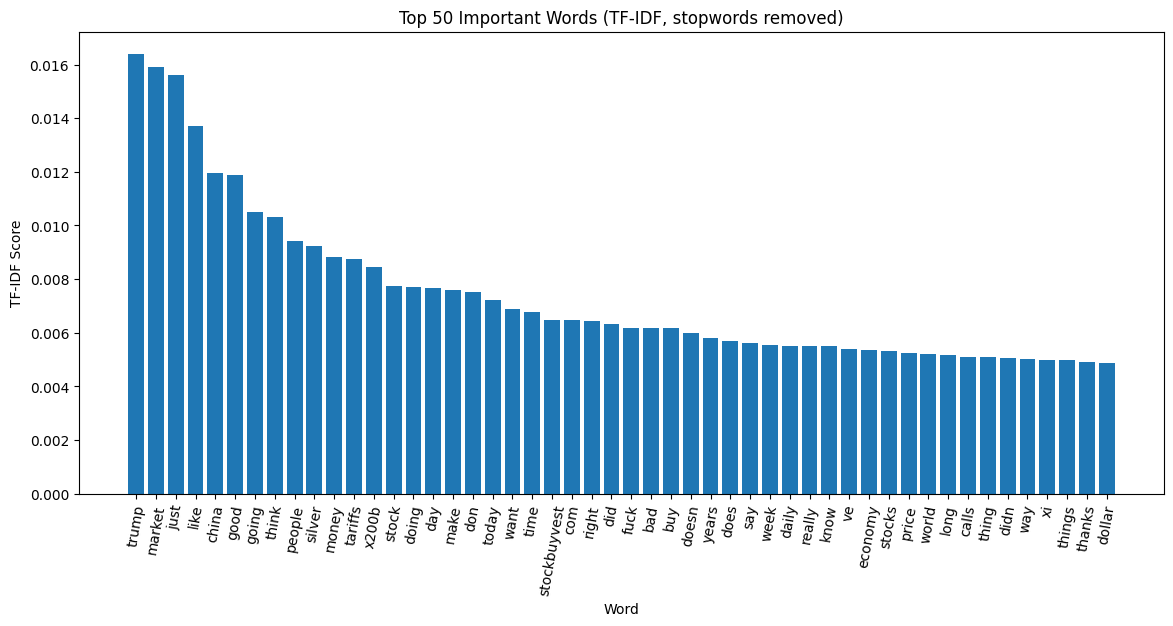

In [155]:
from sklearn.feature_extraction.text import TfidfVectorizer
import matplotlib.pyplot as plt
import pandas as pd

tfidf_vectorizer = TfidfVectorizer(stop_words='english')
X_tfidf = tfidf_vectorizer.fit_transform(X['text'])  

tfidf_scores = X_tfidf.mean(axis=0).A1  
terms = tfidf_vectorizer.get_feature_names_out()

df_tfidf = pd.DataFrame({'term': terms, 'score': tfidf_scores})
top50 = df_tfidf.sort_values(by='score', ascending=False).head(50)

plt.figure(figsize=(14,6))
plt.bar(top50['term'], top50['score'])
plt.xticks(rotation=80)
plt.title("Top 50 Important Words (TF-IDF, stopwords removed)")
plt.xlabel("Word")
plt.ylabel("TF-IDF Score")
plt.show()

## Exercise 12 

In [159]:
# compute term frequencies
term_frequencies = []
for j in range(0, X_counts.shape[1]):
    term_frequencies.append(sum(X_counts[:, j].toarray()))

term_frequencies = np.asarray(X_counts.sum(axis=0))[0]
term_frequencies[0]  # sum of first term

np.int64(4)

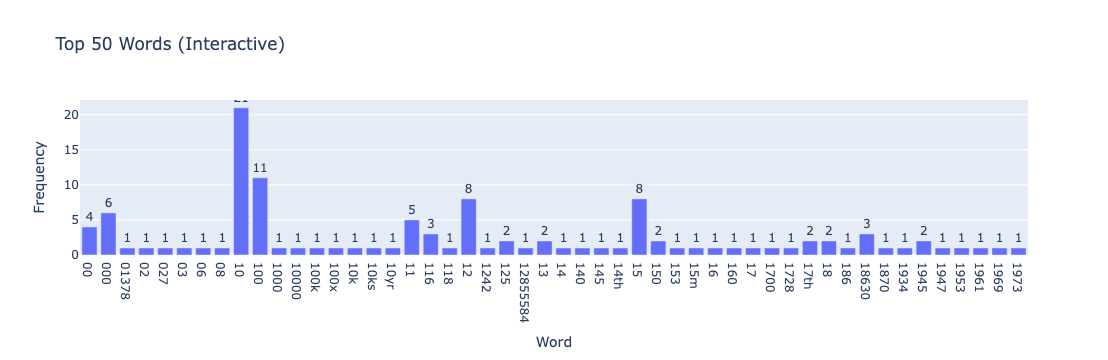

In [163]:
import pandas as pd
import plotly.express as px

df_top = pd.DataFrame({
    "Word": count_vect.get_feature_names_out()[:50].astype(str),  # 確保是字串
    "Frequency": term_frequencies[:50]
})

fig = px.bar(
    df_top,
    x="Word",
    y="Frequency",
    text="Frequency",
    title="Top 50 Words (Interactive)"
)

fig.update_traces(textposition="outside")
fig.show()

## Exercise 13

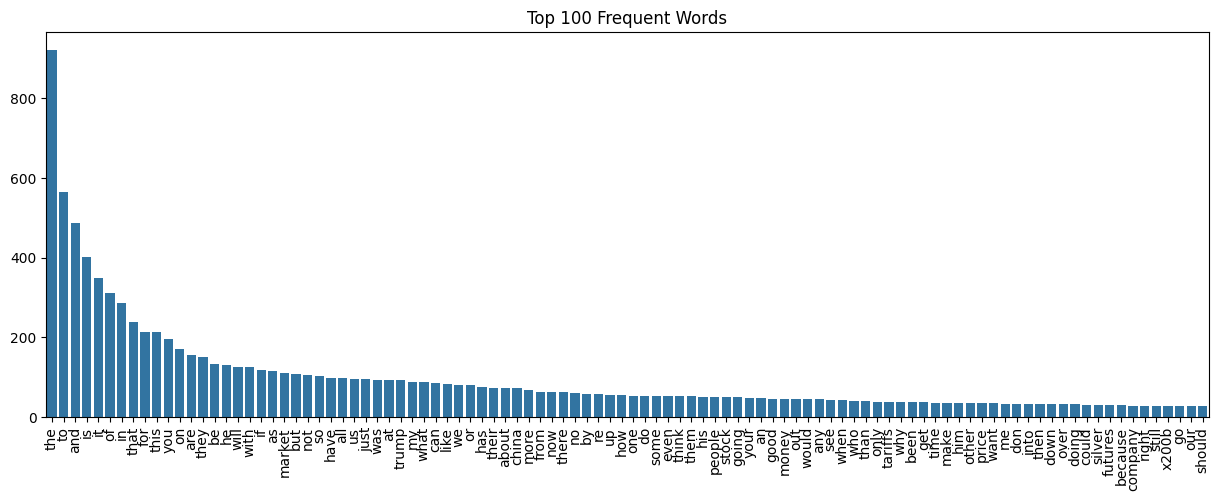

In [165]:
import seaborn as sns

top_k = 100
top_indices = np.argsort(term_frequencies)[::-1][:top_k]

top_words = [count_vect.get_feature_names_out()[i] for i in top_indices]
top_freqs = term_frequencies[top_indices]

plt.figure(figsize=(15,5))
sns.barplot(x=top_words, y=top_freqs)
plt.xticks(rotation=90)
plt.title(f"Top {top_k} Frequent Words")
plt.show()

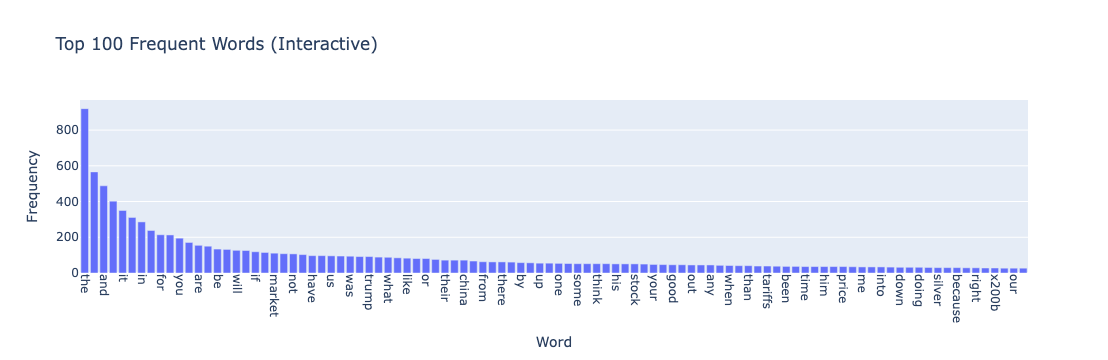

In [166]:
import numpy as np
import plotly.express as px


top_k = 100
top_indices = np.argsort(term_frequencies)[::-1][:top_k]

top_words = [count_vect.get_feature_names_out()[i] for i in top_indices]
top_freqs = term_frequencies[top_indices]


fig = px.bar(
    x=top_words,
    y=top_freqs,
    labels={'x': 'Word', 'y': 'Frequency'},
    title=f"Top {top_k} Frequent Words (Interactive)"
)

fig.update_layout(xaxis_tickangle=90) 
fig.show()

## Exercise 14

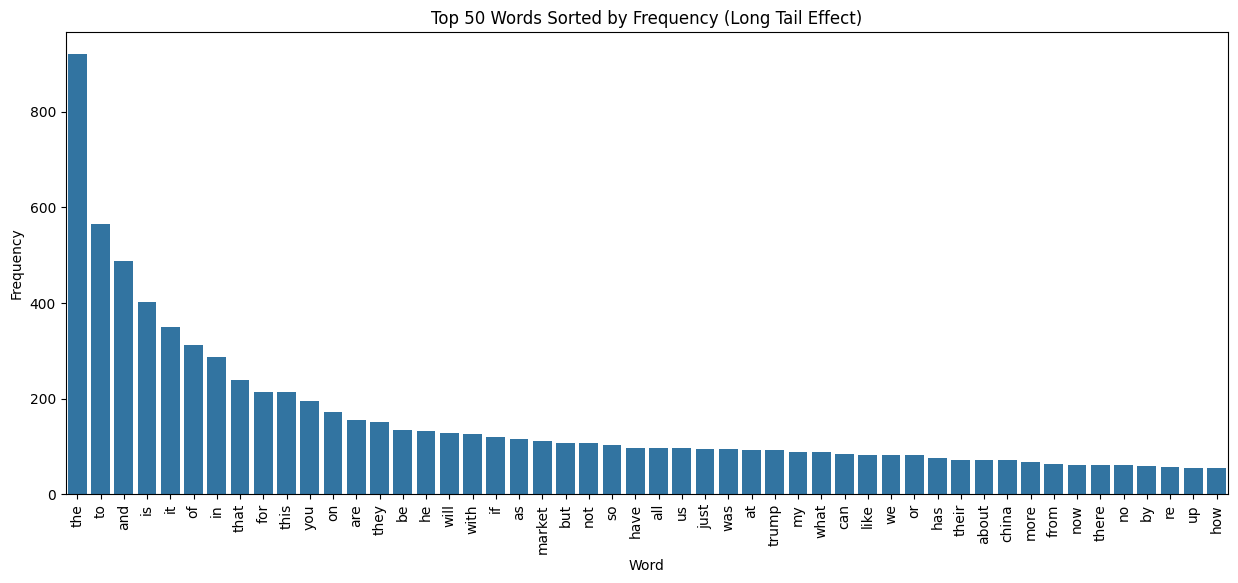

In [168]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


term_frequencies = np.asarray(X_counts.sum(axis=0)).flatten()
terms = count_vect.get_feature_names_out()


sorted_idx = np.argsort(term_frequencies)[::-1] 
sorted_terms = terms[sorted_idx]
sorted_freqs = term_frequencies[sorted_idx]


plt.figure(figsize=(15, 6))
sns.barplot(x=sorted_terms[:50], y=sorted_freqs[:50])  
plt.xticks(rotation=90)
plt.title("Top 50 Words Sorted by Frequency (Long Tail Effect)")
plt.xlabel("Word")
plt.ylabel("Frequency")
plt.show()

/var/folders/b4/js71wv0s24qgjjc3dcxxvv_80000gn/T/ipykernel_6571/2426724564.py:6: UserWarning:

set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.



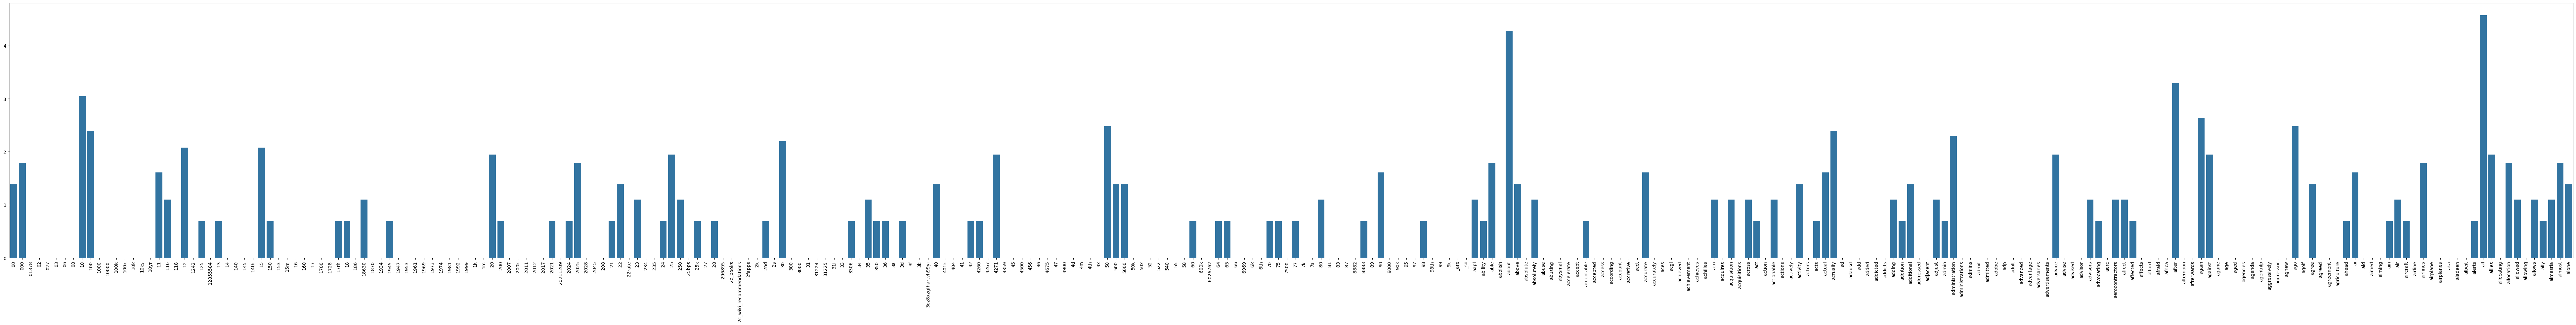

In [170]:
import math
term_frequencies_log = [math.log(i) for i in term_frequencies]
plt.subplots(figsize=(100, 10))
g = sns.barplot(x=count_vect.get_feature_names_out()[:300],
                y=term_frequencies_log[:300])
g.set_xticklabels(count_vect.get_feature_names_out()[:300], rotation = 90);

## Exercise 15

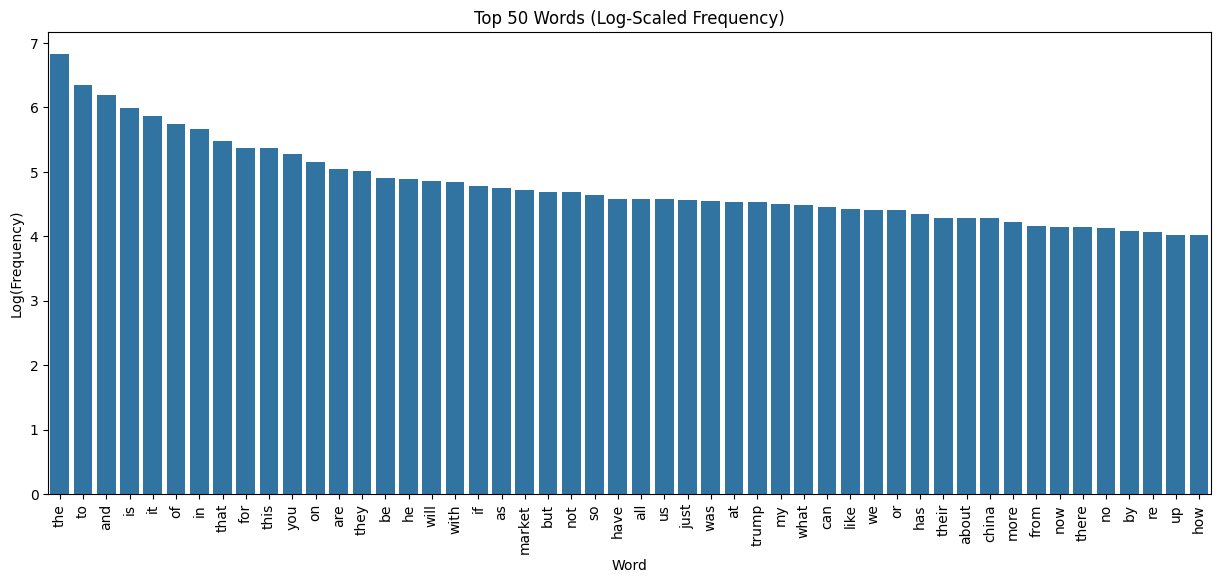

In [171]:
import math

term_frequencies_log = [math.log(i+1) for i in sorted_freqs]

plt.figure(figsize=(15, 6))
sns.barplot(x=sorted_terms[:50], y=term_frequencies_log[:50])
plt.xticks(rotation=90)
plt.title("Top 50 Words (Log-Scaled Frequency)")
plt.xlabel("Word")
plt.ylabel("Log(Frequency)")
plt.show()

## New data Visualization

### Text Length by Sentiment

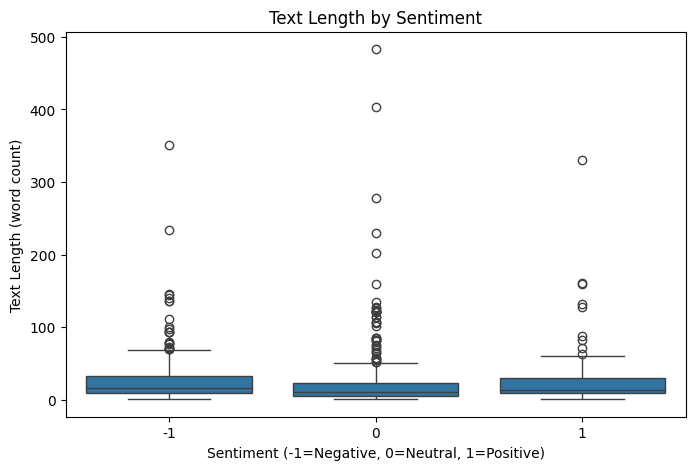

In [174]:
import seaborn as sns
import matplotlib.pyplot as plt

# Compute text length in words
X["text_length"] = X["text"].apply(lambda x: len(x.split()))

# Boxplot of text length per sentiment
plt.figure(figsize=(8,5))
sns.boxplot(x="label", y="text_length", data=X)
plt.title("Text Length by Sentiment")
plt.xlabel("Sentiment (-1=Negative, 0=Neutral, 1=Positive)")
plt.ylabel("Text Length (word count)")
plt.show()

### Most Frequent Words per Sentiment

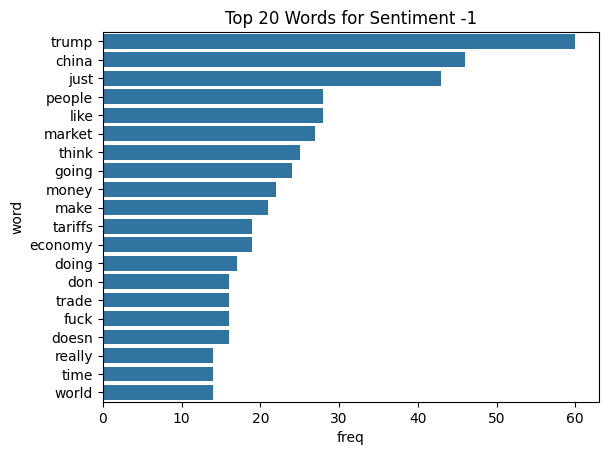

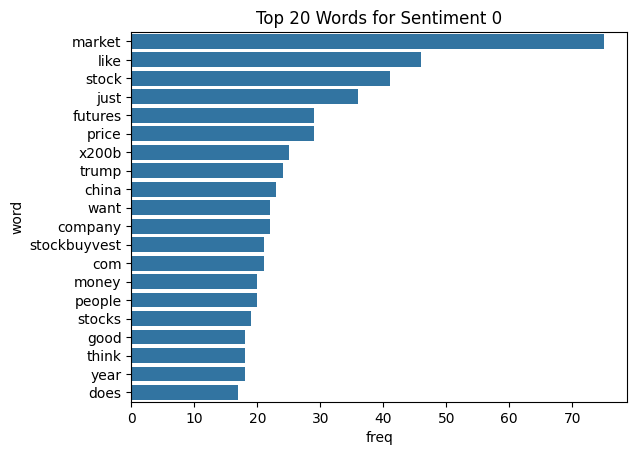

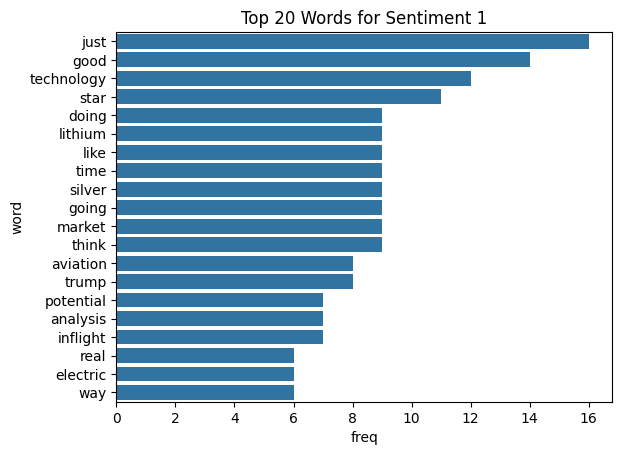

In [176]:
from sklearn.feature_extraction.text import CountVectorizer
import pandas as pd

# Function to plot top-N words for a given sentiment
def plot_top_words_per_sentiment(sentiment, top_n=20):
    vect = CountVectorizer(stop_words="english")
    subset = X[X["label"] == sentiment]
    X_counts = vect.fit_transform(subset["text"])
    
    word_freq = pd.DataFrame({
        "word": vect.get_feature_names_out(),
        "freq": X_counts.sum(axis=0).A1
    }).sort_values("freq", ascending=False).head(top_n)
    
    sns.barplot(x="freq", y="word", data=word_freq)
    plt.title(f"Top {top_n} Words for Sentiment {sentiment}")
    plt.show()

# Plot for negative, neutral, positive
for s in [-1, 0, 1]:
    plot_top_words_per_sentiment(s)

### N-grams Analysis (Bigrams/Trigrams)

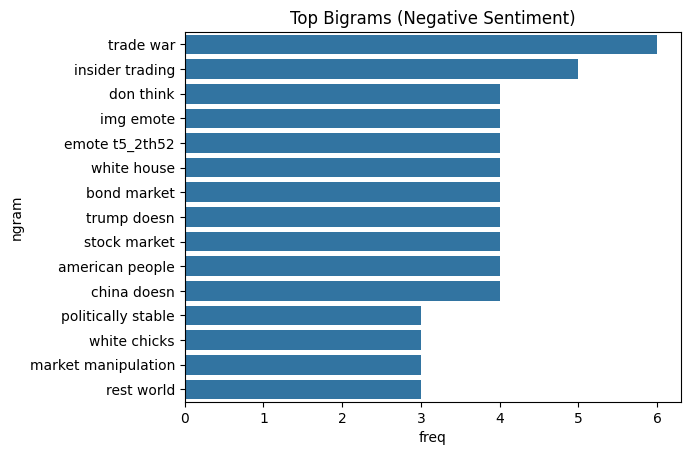

In [178]:
# Example: bigrams for negative sentiment
vect = CountVectorizer(ngram_range=(2,2), stop_words="english")
subset = X[X["label"] == -1]  # choose sentiment
X_counts = vect.fit_transform(subset["text"])

word_freq = pd.DataFrame({
    "ngram": vect.get_feature_names_out(),
    "freq": X_counts.sum(axis=0).A1
}).sort_values("freq", ascending=False).head(15)

sns.barplot(x="freq", y="ngram", data=word_freq)
plt.title("Top Bigrams (Negative Sentiment)")
plt.show()

### TF-IDF Visualization

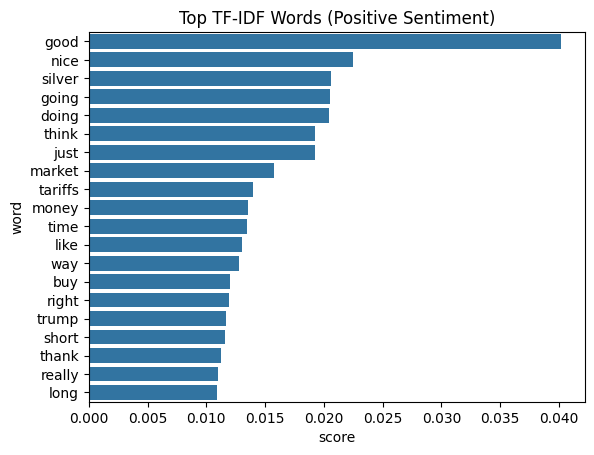

In [179]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Example: positive sentiment
vect = TfidfVectorizer(stop_words="english")
subset = X[X["label"] == 1]
X_tfidf = vect.fit_transform(subset["text"])

# Compute average TF-IDF score for each word
avg_tfidf = X_tfidf.mean(axis=0).A1
word_score = pd.DataFrame({
    "word": vect.get_feature_names_out(),
    "score": avg_tfidf
}).sort_values("score", ascending=False).head(20)

sns.barplot(x="score", y="word", data=word_score)
plt.title("Top TF-IDF Words (Positive Sentiment)")
plt.show()

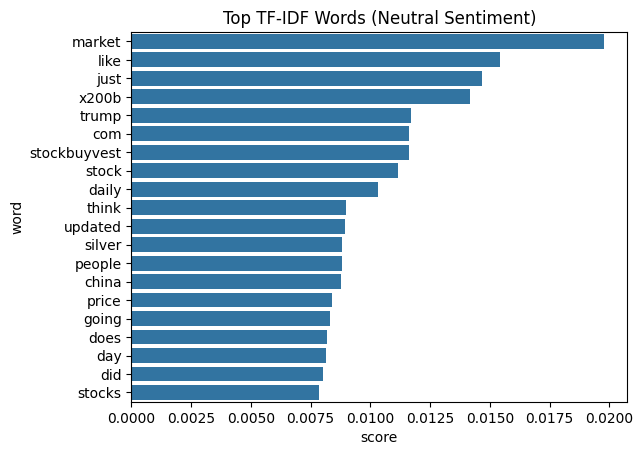

In [186]:
from sklearn.feature_extraction.text import TfidfVectorizer

vect = TfidfVectorizer(stop_words="english")
subset = X[X["label"] == 0]
X_tfidf = vect.fit_transform(subset["text"])

avg_tfidf = X_tfidf.mean(axis=0).A1
word_score = pd.DataFrame({
    "word": vect.get_feature_names_out(),
    "score": avg_tfidf
}).sort_values("score", ascending=False).head(20)

sns.barplot(x="score", y="word", data=word_score)
plt.title("Top TF-IDF Words (Neutral Sentiment)")
plt.show()

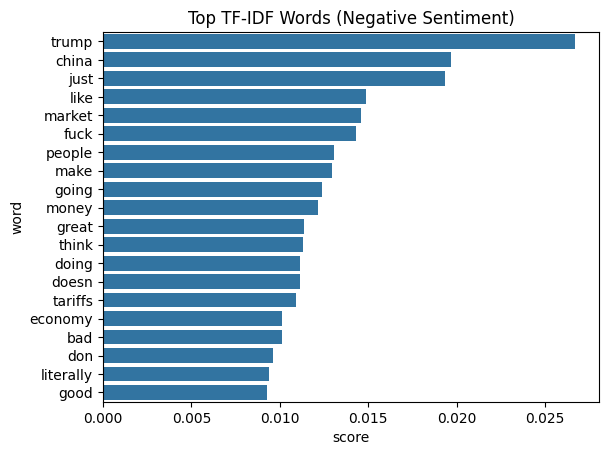

In [185]:
from sklearn.feature_extraction.text import TfidfVectorizer

vect = TfidfVectorizer(stop_words="english")
subset = X[X["label"] == -1]
X_tfidf = vect.fit_transform(subset["text"])

avg_tfidf = X_tfidf.mean(axis=0).A1
word_score = pd.DataFrame({
    "word": vect.get_feature_names_out(),
    "score": avg_tfidf
}).sort_values("score", ascending=False).head(20)

sns.barplot(x="score", y="word", data=word_score)
plt.title("Top TF-IDF Words (Negative Sentiment)")
plt.show()

### Dimensionality Reduction (PCA)

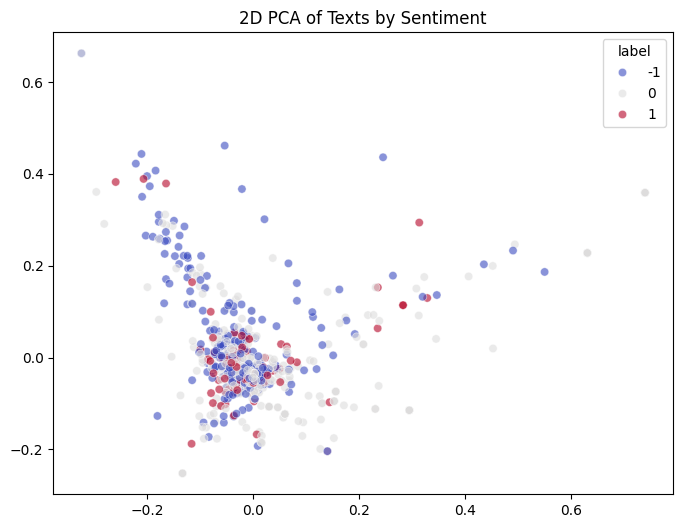

In [181]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import PCA

# Compute TF-IDF on all text
vect = TfidfVectorizer(max_features=500, stop_words="english")
X_tfidf = vect.fit_transform(X["text"])

# Reduce to 2D with PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_tfidf.toarray())

# Scatterplot of 2D PCA with sentiment colors
plt.figure(figsize=(8,6))
sns.scatterplot(x=X_pca[:,0], y=X_pca[:,1], hue=X["label"], palette="coolwarm", alpha=0.6)
plt.title("2D PCA of Texts by Sentiment")
plt.show()

# Phase 2

In [ ]:
### Begin Assignment Here